In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [2]:
df = pd.read_csv('./TensorFlow_FILES/DATA/fake_reg.csv');
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


target variable: price <br>
variables to be used for training: feature 1 and feature 2

## Exploratory Data Analysis (EDA)

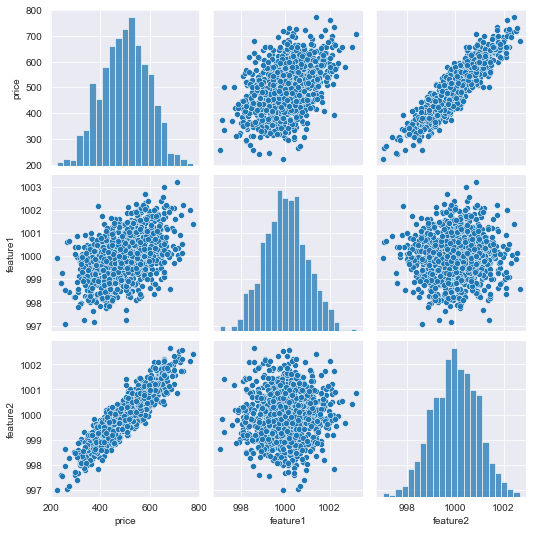

In [3]:
sns.set_style('darkgrid')
sns.pairplot(df)

## Train

In [4]:
from sklearn.model_selection import train_test_split;

In [5]:
## NOTE: using the .values to convert values into an array for the NN
X = df[['feature1', 'feature2']].values;
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [6]:
## NOTE: using the .values to convert values into an array for the NN
y = df['price'].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler;

In [9]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [10]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [11]:
scaler = MinMaxScaler()

<strong>NOTE:</strong> not gonna fit X_test at all to prevent data leaking!

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train_scaled = scaler.transform(X_train);
X_train_scaled

array([[0.22179862, 0.55212838],
       [0.34106018, 0.45061693],
       [0.44187649, 0.6432228 ],
       ...,
       [0.4679684 , 0.12119512],
       [0.51313398, 0.51308096],
       [0.51079305, 0.26371433]])

In [14]:
X_test_scaled = scaler.transform(X_test);
X_test_scaled

array([[ 0.32203602,  0.91084715],
       [ 0.82355331,  0.38462938],
       [ 0.34415736,  0.62919178],
       [ 0.43326779,  0.51961344],
       [ 0.36833834,  0.66361335],
       [ 0.7299952 ,  0.51678287],
       [ 0.76956271,  0.59007599],
       [ 0.51225106,  0.77019591],
       [ 0.31181604,  0.80844002],
       [ 0.37616037,  0.68823373],
       [ 0.58406826,  0.30985033],
       [ 0.31897328,  0.55259415],
       [ 0.50476877,  0.40984817],
       [ 0.54677279,  0.45970661],
       [ 0.57599467,  0.46056919],
       [ 0.63965434,  0.5794404 ],
       [ 0.60140282,  0.19852836],
       [ 0.46866324,  0.53549539],
       [ 0.45845809,  0.69305468],
       [ 0.52195013,  0.5664309 ],
       [ 0.35823647,  0.53113085],
       [ 0.28950684,  0.30842618],
       [ 0.32173317,  0.57205824],
       [ 0.72403915,  0.46735233],
       [ 0.74451112,  0.56954381],
       [ 0.70465938,  0.50898422],
       [ 0.50705098,  0.24481192],
       [ 0.37344685,  0.68264857],
       [ 0.49565511,

In [15]:
print ('For training set:\nmin: ', X_train_scaled.min(), ' max: ', X_train_scaled.max(), '\n')

For training set:
min:  0.0  max:  1.0 



In [16]:
print ('For test set:\nmin: ', X_test_scaled.min(), ' max: ', X_test_scaled.max(), '\n')

For test set:
min:  -0.014108392024525074  max:  0.9575292620125708 



## Construct Neural Network

In [17]:
#!conda list

In [18]:
import tensorflow as tf;
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [19]:
#help(Sequential)
INPUT_VALS = 4
n_epochs = 300

In [20]:
model = Sequential();

In [21]:
model.add(Dense(INPUT_VALS, activation = 'relu'));
model.add(Dense(4, activation = 'relu'));
model.add(Dense(4, activation = 'relu'));

# depending on what we are trying to predict here; 
# therefore we need a single neuron here 
model.add(Dense(1));


In [22]:
model.compile(optimizer = "rmsprop", loss = 'mse', metrics = ['accuracy'])

In [23]:
model.fit(x = X_train_scaled, y = y_train, epochs = n_epochs, verbose = 1)

Epoch 1/300
22/22 [==============================] - 1s 3ms/step - loss: 258664.9219 - accuracy: 0.0000e+00
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 258423.7969 - accuracy: 0.0000e+00
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 258184.1094 - accuracy: 0.0000e+00
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 257928.7812 - accuracy: 0.0000e+00
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 257652.7500 - accuracy: 0.0000e+00
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 257353.5781 - accuracy: 0.0000e+00
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 257026.6562 - accuracy: 0.0000e+00
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 256669.2500 - accuracy: 0.0000e+00
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 256281.2188 - accuracy: 0.0000e+00
Epoch 10/300
22/22 [========

22/22 [==============================] - 0s 3ms/step - loss: 39405.4219 - accuracy: 0.0000e+00
Epoch 77/300
22/22 [==============================] - 0s 2ms/step - loss: 34547.5469 - accuracy: 0.0000e+00
Epoch 78/300
22/22 [==============================] - 0s 2ms/step - loss: 29927.3652 - accuracy: 0.0000e+00
Epoch 79/300
22/22 [==============================] - 0s 3ms/step - loss: 25561.1426 - accuracy: 0.0000e+00
Epoch 80/300
22/22 [==============================] - 0s 3ms/step - loss: 21439.4570 - accuracy: 0.0000e+00
Epoch 81/300
22/22 [==============================] - 0s 3ms/step - loss: 17695.6016 - accuracy: 0.0000e+00
Epoch 82/300
22/22 [==============================] - 0s 3ms/step - loss: 14270.4590 - accuracy: 0.0000e+00
Epoch 83/300
22/22 [==============================] - 0s 2ms/step - loss: 11188.8613 - accuracy: 0.0000e+00
Epoch 84/300
22/22 [==============================] - 0s 3ms/step - loss: 8549.3711 - accuracy: 0.0000e+00
Epoch 85/300
22/22 [======================

22/22 [==============================] - 0s 2ms/step - loss: 491.6112 - accuracy: 0.0000e+00
Epoch 153/300
22/22 [==============================] - 0s 2ms/step - loss: 472.9655 - accuracy: 0.0000e+00
Epoch 154/300
22/22 [==============================] - 0s 2ms/step - loss: 457.2128 - accuracy: 0.0000e+00
Epoch 155/300
22/22 [==============================] - 0s 2ms/step - loss: 438.7211 - accuracy: 0.0000e+00
Epoch 156/300
22/22 [==============================] - 0s 2ms/step - loss: 421.4776 - accuracy: 0.0000e+00
Epoch 157/300
22/22 [==============================] - 0s 3ms/step - loss: 403.3007 - accuracy: 0.0000e+00
Epoch 158/300
22/22 [==============================] - 0s 2ms/step - loss: 386.1266 - accuracy: 0.0000e+00
Epoch 159/300
22/22 [==============================] - 0s 2ms/step - loss: 369.7817 - accuracy: 0.0000e+00
Epoch 160/300
22/22 [==============================] - 0s 2ms/step - loss: 353.2638 - accuracy: 0.0000e+00
Epoch 161/300
22/22 [==============================

22/22 [==============================] - 0s 2ms/step - loss: 23.3403 - accuracy: 0.0000e+00
Epoch 230/300
22/22 [==============================] - 0s 2ms/step - loss: 23.8134 - accuracy: 0.0000e+00
Epoch 231/300
22/22 [==============================] - 0s 2ms/step - loss: 23.0766 - accuracy: 0.0000e+00
Epoch 232/300
22/22 [==============================] - 0s 2ms/step - loss: 23.4129 - accuracy: 0.0000e+00
Epoch 233/300
22/22 [==============================] - 0s 2ms/step - loss: 23.3176 - accuracy: 0.0000e+00
Epoch 234/300
22/22 [==============================] - 0s 2ms/step - loss: 23.2462 - accuracy: 0.0000e+00
Epoch 235/300
22/22 [==============================] - 0s 2ms/step - loss: 23.1280 - accuracy: 0.0000e+00
Epoch 236/300
22/22 [==============================] - 0s 2ms/step - loss: 23.0962 - accuracy: 0.0000e+00
Epoch 237/300
22/22 [==============================] - 0s 2ms/step - loss: 23.2325 - accuracy: 0.0000e+00
Epoch 238/300
22/22 [==============================] - 0s 2m

In [24]:
loss_df = pd.DataFrame(model.history.history);

<Axes: >

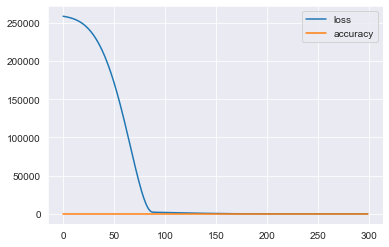

In [25]:
loss_df.plot()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### NN Model evaluation

In [27]:
print ("Model Loss (mse): ", model.evaluate(x = X_test_scaled, y = y_test, verbose = 0)[0])

Model Loss (mse):  27.588909149169922


In [28]:
y_pred = model.predict(X_test_scaled) 
y_pred.shape

10/10 [==============================] - 0s 3ms/step


(300, 1)

In [29]:
pred_df = pd.Series(y_test.reshape(300,))

In [30]:
pred_df = pd.DataFrame(pred_df, columns = ['Test True Y']);
pred_df.head()

,Test True Y
0,655.391403
1,511.366708
2,515.778446
3,478.358238
4,543.830279


In [31]:
pred_df['Predictions'] = y_pred;
pred_df.head()

,Test True Y,Predictions
0,655.391403,655.816711
1,511.366708,513.211975
2,515.778446,519.623901
3,478.358238,486.203705
4,543.830279,542.802246


Text(0.5, 1.0, 'Model Evaluation (MSE)')

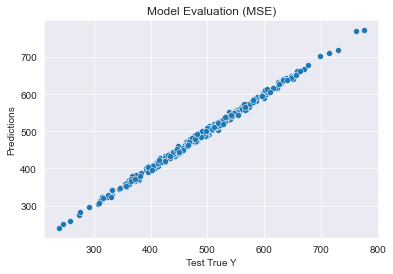

In [32]:
# to plot the differences for evaluation
sns.scatterplot(x = 'Test True Y', y = 'Predictions', data = pred_df)
plt.title('Model Evaluation (MSE)')

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error;

In [34]:
print ('Mean absolute error:', mean_absolute_error(pred_df['Test True Y'], pred_df['Predictions']))

Mean absolute error: 4.168078775688776


<strong>NOTE:</strong> Since this is a $4 value error, it translates to about 1\% of an error since the average price is about 498 dollars as shown below. \[(4/498 * 100) ~= 1%\]

In [35]:
print ('Mean squared error:', mean_squared_error(pred_df['Test True Y'], pred_df['Predictions']))

Mean squared error: 27.588906618295894


In [36]:
print ('Root Mean squared error:', np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Predictions'])))

Root Mean squared error: 5.2525143139544035


In [37]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [38]:
# price estimation for new gem
new_gem = [[998, 1000]]

In [39]:
new_gem_scaled = scaler.transform(new_gem)

In [40]:
print ("Price estimation for new gem:", model.predict(new_gem_scaled, verbose = 0)[0][0])
print ("Model error Rate (MSE):", model.evaluate(X_test_scaled, y_test, verbose = 0)[0])

Price estimation for new gem: 420.3366
Model error Rate (MSE): 27.588909149169922


### Save Model

In [42]:
from tensorflow.keras.models import load_model;
model.save('my_gem_model.h5')

In [44]:
# loading model
later_model = load_model('my_gem_model.h5')

In [47]:
later_model.predict(new_gem_scaled, verbose = 0)[0][0]

420.3366